In [35]:
import pandas as pd
import numpy as np
import copy
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectPercentile
import missingno as msno
import seaborn as sns
import graphviz
from sklearn.feature_selection import f_classif
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV



# Predict With Decision_tree /  RandomForest

In [36]:
df1=pd.read_csv('/content/diabetes_prediction_dataset.csv')

In [37]:
df1.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [38]:
features_to_response=df1.columns.tolist()

In [39]:
itens_to_remove=['gender','smoking_history']

In [40]:
feature_to_response=[item for item in features_to_response if item  not in itens_to_remove]

In [41]:
feature_to_response

['age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'diabetes']

In [42]:
tree_= tree.DecisionTreeClassifier(criterion='gini',max_depth=3)

In [43]:
X_train,X_test,y_train,y_test=train_test_split(df1[feature_to_response[:-1]].values,df1['diabetes'].values,
                                               test_size=0.2,random_state=24)

In [44]:
np.mean(y_test)

0.084

In [45]:
np.mean(df1['diabetes'])

0.085

In [46]:
tree_.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [47]:
data_expt=tree.export_graphviz(tree_,filled=True,feature_names=feature_to_response[:-1],rounded=True,class_names=['No','Yes'],
                               proportion=True,out_file=None)

In [48]:
graf_= graphviz.Source(data_expt)

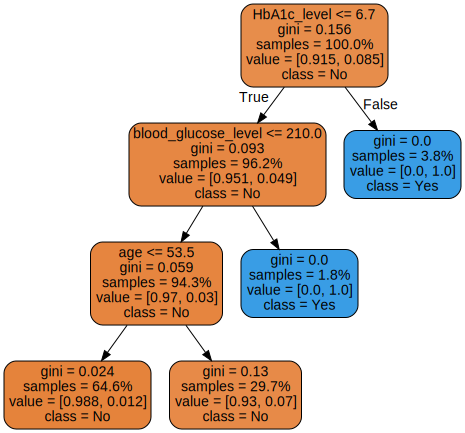

In [49]:
graf_

In [50]:
params={'max_depth':[3,6,9,12]}

In [51]:
grid=GridSearchCV(tree_,scoring='roc_auc',return_train_score=True,error_score=np.nan,cv=4,param_grid=params,verbose=1)

In [52]:
grid.fit(X_train,y_train)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'max_depth': [3, 6, 9, 12]}, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [53]:
grid_results=pd.DataFrame(grid.cv_results_)

In [54]:
grid_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.050740,0.007996,0.007511,0.000294,3,{'max_depth': 3},0.906370,0.906464,0.893618,0.905715,0.903042,0.005448,4,0.903536,0.904224,0.905728,0.904475,0.904491,0.000793
1,0.077957,0.002894,0.008463,0.001221,6,{'max_depth': 6},0.966789,0.966140,0.958833,0.965134,0.964224,0.003168,3,0.964871,0.967533,0.965456,0.965634,0.965874,0.000999
2,0.096535,0.002729,0.007708,0.000069,9,{'max_depth': 9},0.974751,0.974221,0.972379,0.975230,0.974145,0.001080,1,0.976146,0.976652,0.976542,0.975874,0.976303,0.000311
3,0.115953,0.008485,0.008591,0.000301,12,{'max_depth': 12},0.964752,0.967817,0.966198,0.961899,0.965167,0.002176,2,0.980901,0.981315,0.981379,0.981099,0.981173,0.000188


In [55]:
grid.best_params_

{'max_depth': 9}

In [56]:
Importances=pd.DataFrame({'Features':feature_to_response[:-1],'Importances':
                         grid.best_estimator_.feature_importances_}
                         )

In [57]:
Importances.sort_values('Importances',ascending=False).head(5)

,Features,Importances
4,HbA1c_level,0.629163
5,blood_glucose_level,0.325153
3,bmi,0.019660
0,age,0.016144
2,heart_disease,0.005235


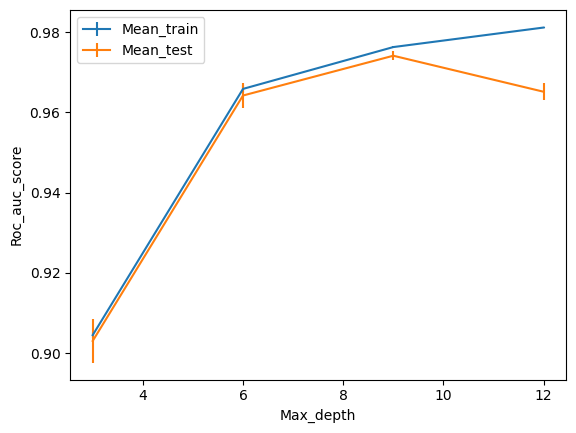

In [58]:
axes=plt.axes()
axes.errorbar(grid_results['param_max_depth'],grid_results['mean_train_score'],yerr=grid_results['std_train_score'],label='Mean_train')
axes.errorbar(grid_results['param_max_depth'],grid_results['mean_test_score'],yerr=grid_results['std_test_score'], label='Mean_test')
axes.set_xlabel('Max_depth')
axes.set_ylabel('Roc_auc_score')
plt.legend()

# Random Forest

In [59]:
rf_random=RandomForestClassifier(max_features='auto',min_samples_leaf=1,min_samples_split=2,criterion='gini',
                                  verbose=0,min_impurity_decrease=0.0,oob_score=False,bootstrap=True,warm_start=False
                                  )

In [60]:
params={'n_estimators':[10,50,100,200],'max_depth':[3,6,9,12]}

In [61]:
grid_rf_= GridSearchCV(rf_random,cv=4,scoring='roc_auc',param_grid=params,error_score=np.nan,
                       verbose=1,return_train_score=True,refit=True)

In [30]:
grid_rf_.fit(X_train,y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

GridSearchCV(cv=4, estimator=RandomForestClassifier(max_features='auto'),
             param_grid={'max_depth': [3, 6, 9, 12],
                         'n_estimators': [10, 50, 100, 200]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [31]:
cv_results=pd.DataFrame(grid_rf_.cv_results_)

In [32]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.173386,0.004779,0.020048,0.001707,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.951818,0.948660,0.932283,0.936129,0.942222,0.008207,16,0.949449,0.950975,0.939184,0.932123,0.942933,0.007715
1,1.919858,0.613597,0.132086,0.078326,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.948098,0.950449,0.948838,0.952142,0.949882,0.001557,15,0.947495,0.953066,0.954081,0.948484,0.950781,0.002837
2,3.019106,1.309136,0.156208,0.032639,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.950037,0.948077,0.946693,0.954876,0.949921,0.003098,14,0.948651,0.950868,0.951625,0.951569,0.950678,0.001208
3,3.590957,0.278022,0.262270,0.027832,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.954576,0.950262,0.946665,0.955057,0.951640,0.003426,13,0.952886,0.953116,0.952516,0.951264,0.952445,0.000715
4,0.261020,0.019999,0.024116,0.002058,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.967064,0.963710,0.966492,0.967249,0.966129,0.001424,12,0.965802,0.965502,0.970319,0.965050,0.966668,0.002125
5,1.426627,0.284251,0.087960,0.010291,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.967981,0.966046,0.965066,0.969189,0.967071,0.001611,11,0.967140,0.968469,0.969556,0.968087,0.968313,0.000865
6,2.599392,0.275622,0.162415,0.012116,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.969995,0.965618,0.965096,0.969593,0.967575,0.002231,10,0.969093,0.968024,0.969000,0.968559,0.968669,0.000424
7,5.150769,0.275183,0.310660,0.006201,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.969863,0.967415,0.966394,0.970759,0.968608,0.001770,9,0.968983,0.969724,0.970010,0.969608,0.969581,0.000375
8,0.319245,0.012579,0.026168,0.000616,9,10,"{'max_depth': 9, 'n_estimators': 10}",0.975197,0.972309,0.971568,0.976009,0.973771,0.001873,8,0.975704,0.975780,0.976371,0.975939,0.975949,0.000258
9,1.701061,0.351428,0.103073,0.010647,9,50,"{'max_depth': 9, 'n_estimators': 50}",0.975100,0.973974,0.971119,0.975348,0.973885,0.001679,7,0.975752,0.977396,0.976404,0.976102,0.976414,0.000613


In [33]:
grid_rf_.best_params_

{'max_depth': 12, 'n_estimators': 200}

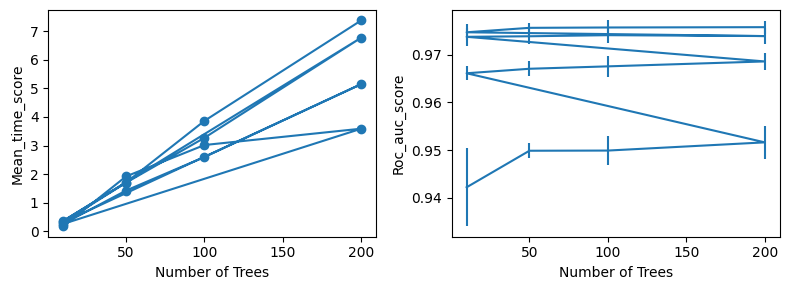

In [34]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(8,3))
axes[0].plot(cv_results['param_n_estimators'],cv_results['mean_fit_time'],'-o')
axes[0].set_ylabel('Mean_time_score')
axes[0].set_xlabel('Number of Trees')
axes[1].errorbar(cv_results['param_n_estimators'],cv_results['mean_test_score'],yerr=cv_results['std_test_score'])
axes[1].set_ylabel('Roc_auc_score')
axes[1].set_xlabel('Number of Trees')
plt.tight_layout()
